In [28]:
import matplotlib.pyplot as plt
from scipy import stats  # 과학용 계산 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

plt.show()

print(f"{metrics.classification_report(y_test, y_pred)}\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        36
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        31
           7       0.97      1.00      0.98        29
           8       0.97      0.97      0.97        40
           9       1.00      0.95      0.98        44

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




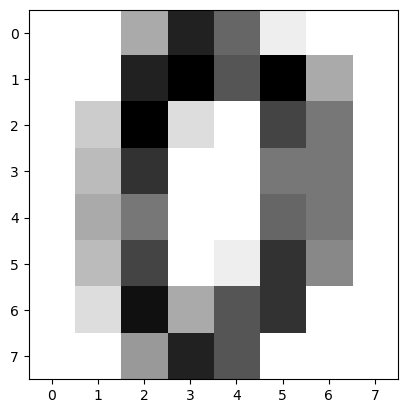

In [30]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

0.9805555555555555
[8]


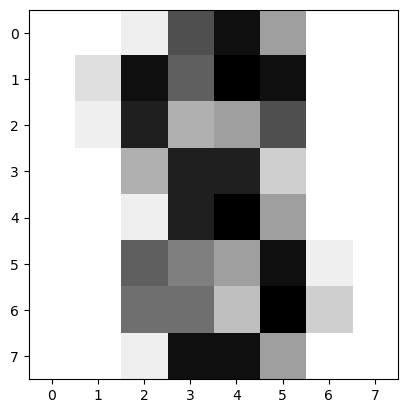

In [32]:
y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)

In [37]:
X = data
y = digits.target

In [38]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [39]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [40]:
Y = pd.get_dummies(y).values

In [41]:
Y

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False]])

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [43]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (1437, 64)
X_test :  (360, 64)
y_train :  (1437, 10)
y_test :  (360, 10)


In [44]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(128,input_shape=(64,),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 80)             │        10,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,110 (94.18 KB)

 Trainable params: 24,110 (94.18 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2020 - loss: 9.6909 - val_accuracy: 0.5806 - val_loss: 1.2424
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5669 - loss: 1.1300 - val_accuracy: 0.6889 - val_loss: 0.9361
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7162 - loss: 0.8103 - val_accuracy: 0.7000 - val_loss: 1.0125
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7817 - loss: 0.6963 - val_accuracy: 0.8583 - val_loss: 0.5088
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8221 - loss: 0.5551 - val_accuracy: 0.8417 - val_loss: 0.5627
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8328 - loss: 0.5628 - val_accuracy: 0.8361 - val_loss: 0.6066
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8412 - loss: 0.5348 - val_accuracy: 0.8583 - val_loss: 0.4094
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8459 - loss: 0.5369 - val_accuracy: 0.7889 - val_loss:

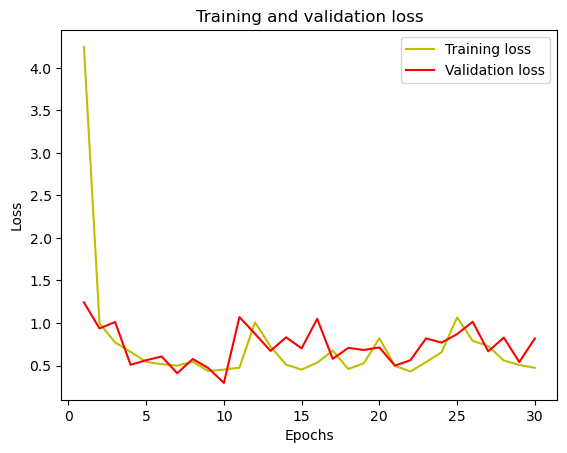

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

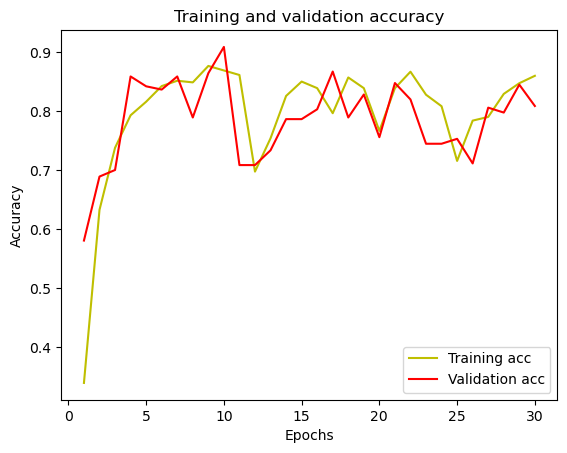

In [47]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.89      0.71      0.79        35
           2       0.91      0.83      0.87        36
           3       0.76      0.86      0.81        29
           4       0.88      0.97      0.92        30
           5       0.96      0.62      0.76        40
           6       1.00      0.91      0.95        44
           7       0.77      0.95      0.85        39
           8       0.71      0.51      0.60        39
           9       0.52      0.83      0.64        41

    accuracy                           0.81       360
   macro avg       0.84      0.82      0.82       360
weighted avg       0.84      0.81      0.81       360

[[26  0  0  0  0  0  0  0  0  1]
 [ 0 25  0  0  3  0  0  1  2  4]
 [ 0  0 30  0  0  0  0  0  3  3]
 [ 0  0  0 25  0  0  0  2  1  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  8  0 25  0  2  0  5]
 [ 0  2  0  0  0  1 40  0  1  0]
 [ 0  0  0